In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sbn

%matplotlib inline

In [2]:
df = pd.read_csv('Student_Academic_Prediction.csv', sep = ';')
df.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [4]:
#creating a copy of the dataframe
df_clean = df.copy()

In [5]:
Marital_status = {1: "single", 2: "married", 3: "widower", 4: "divorced", 
            5: "facto union", 6: "legally separated"}

df_clean['Marital_status'] = df_clean['Marital status'].replace(Marital_status)
df_clean.Marital_status.unique()

array(['single', 'married', 'divorced', 'widower', 'facto union',
       'legally separated'], dtype=object)

In [6]:
Course = {33: "Biofuel Production Technologies", 171: "Animation and Multimedia Design",
          8014: "Social Service (evening attendance)", 9003: "Agronomy", 9070: "Communication Design",
          9085: "Veterinary Nursing", 9119: "Informatics Engineering", 9130: "Equinculture",
          9147: "Management", 9238: "Social Service", 9254: "Tourism", 9500: "Nursing", 9556: "Oral Hygiene",
          9670: "Advertising and Marketing Management",
          9773: "Journalism and Communication", 9853: "Basic Education", 9991: "Management (evening attendance)"}

df_clean['Course'] = df_clean['Course'].replace(Course)
df_clean.Course.unique()

array(['Animation and Multimedia Design', 'Tourism',
       'Communication Design', 'Journalism and Communication',
       'Social Service (evening attendance)',
       'Management (evening attendance)', 'Nursing', 'Social Service',
       'Advertising and Marketing Management', 'Basic Education',
       'Veterinary Nursing', 'Equinculture', 'Oral Hygiene', 'Management',
       'Agronomy', 'Biofuel Production Technologies',
       'Informatics Engineering'], dtype=object)

In [7]:
Previous_qualification = {1: "Secondary education", 2: "Higher education - bachelor's degree", 3: "Higher education - degree",
                          4: "Higher education - master's", 5: "Higher education - doctorate", 6: "Frequency of higher education",
                          9: "12th year of schooling - not completed", 10: "11th year of schooling - not completed",
                          12: "Other - 11th year of schooling", 14: "10th year of schooling",
                          15: "10th year of schooling - not completed",
                          19: "Basic education 3rd cycle (9th/10th/11th year) or equiv.", 
                          38: "Basic education 2nd cycle (6th/7th/8th year) or equiv.",
                          39: "Technological specialization course", 40: "Higher education - degree (1st cycle)",
                          42: "Professional higher technical course", 43: "Higher education - master (2nd cycle)"}

df_clean['Previous_qualification'] = df_clean['Previous qualification'].replace(Previous_qualification)
df_clean.Previous_qualification.unique()

array(['Secondary education',
       'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
       'Professional higher technical course',
       'Technological specialization course',
       '11th year of schooling - not completed',
       'Higher education - degree',
       'Higher education - degree (1st cycle)',
       "Higher education - bachelor's degree",
       "Higher education - master's", 'Other - 11th year of schooling',
       'Higher education - master (2nd cycle)',
       '10th year of schooling - not completed',
       'Frequency of higher education',
       '12th year of schooling - not completed',
       'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
       'Higher education - doctorate', '10th year of schooling'],
      dtype=object)

In [8]:
df_clean.rename(columns={'Nacionality':'Nationality'}, inplace = True)
Nationality = {1: "Portuguese", 2: "German", 6: "Spanish", 11: "Italian", 13: "Dutch",
               14: "English", 17: "Lithuanian", 21: "Angolan", 22: "Cape Verdean", 24: "Guinean",
               25: "Mozambican", 26: "Santomean", 32: "Turkish", 41: "Brazilian", 62: "Romanian",
               100: "Moldova (Republic of)", 101: "Mexican", 103: "Ukrainian", 105: "Russian", 108: "Cuban", 109: "Colombian"}

df_clean['Nationality'] = df_clean['Nationality'].replace(Nationality)
df_clean.Nationality.unique()

array(['Portuguese', 'Romanian', 'Spanish', 'Brazilian', 'Santomean',
       'Ukrainian', 'Dutch', 'Mozambican', 'Angolan', 'Mexican',
       'Italian', 'Cape Verdean', 'Turkish', 'Moldova (Republic of)',
       'Guinean', 'Colombian', 'German', 'Cuban', 'Russian', 'English',
       'Lithuanian'], dtype=object)

In [9]:
Mother_qualification = {1: "Secondary Education - 12th Year of Schooling or Eq.",
                        2: "Higher Education - Bachelor's Degree", 3: "Higher Education - Degree",
                        4: "Higher Education - Master's", 5: "Higher Education - Doctorate",
                        6: "Frequency of Higher Education", 9: "12th Year of Schooling - Not Completed",
                        10: "11th Year of Schooling - Not Completed", 11: "7th Year (Old)",
                        12: "Other - 11th Year of Schooling", 14: "10th Year of Schooling", 18: "General commerce course",
                        19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.", 22: "Technical-professional course",
                        26: "7th year of schooling", 27: "2nd cycle of the general high school course",
                        29: "9th Year of Schooling - Not Completed", 30: "8th year of schooling",
                        34: "Unknown", 35: "Can't read or write", 36: "Can read without having a 4th year of schooling",
                        37: "Basic education 1st cycle (4th/5th year) or equiv.",
                        38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
                        39: "Technological specialization course", 40: "Higher education - degree (1st cycle)",
                        41: "Specialized higher studies course", 42: "Professional higher technical course",
                        43: "Higher Education - Master (2nd cycle)", 44: "Higher Education - Doctorate (3rd cycle)"}

df_clean['Mother_qualification'] = df_clean['Mother\'s qualification'].replace(Mother_qualification)
df_clean.Mother_qualification.unique()

array(['Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
       'Secondary Education - 12th Year of Schooling or Eq.',
       'Basic education 1st cycle (4th/5th year) or equiv.',
       'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
       'Higher Education - Degree', "Higher Education - Master's",
       'Professional higher technical course',
       "Higher Education - Bachelor's Degree", 'Unknown',
       'Other - 11th Year of Schooling',
       'Higher education - degree (1st cycle)',
       '12th Year of Schooling - Not Completed',
       'Higher Education - Doctorate',
       'Technological specialization course', '7th Year (Old)',
       'Specialized higher studies course', '8th year of schooling',
       '10th Year of Schooling', "Can't read or write",
       'Can read without having a 4th year of schooling',
       'Frequency of Higher Education',
       '11th Year of Schooling - Not Completed',
       '9th Year of Schooling - Not Completed',
       'High

In [10]:
Father_qualification = {1: "Secondary Education - 12th Year of Schooling or Eq.", 2: "Higher Education - Bachelor's Degree",
                        3: "Higher Education - Degree",4: "Higher Education - Master's", 5: "Higher Education - Doctorate",
                        6: "Frequency of Higher Education", 9: "12th Year of Schooling - Not Completed",
                        10: "11th Year of Schooling - Not Completed", 11: "7th Year (Old)", 12: "Other - 11th Year of Schooling",
                        13: "2nd year complementary high school course", 14: "10th Year of Schooling",
                        18: "General commerce course", 19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.", 
                        20: "Complementary High School Course", 22: "Technical-professional course", 
                        25: "Complementary High School Course - not concluded", 26: "7th year of schooling",
                        27: "2nd cycle of the general high school course", 29: "9th Year of Schooling - Not Completed",
                        30: "8th year of schooling", 31: "General Course of Administration and Commerce", 
                        33: "Supplementary Accounting and Administration", 34: "Unknown", 35: "Can't read or write",
                        36: "Can read without having a 4th year of schooling",
                        37: "Basic education 1st cycle (4th/5th year) or equiv.",
                        38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.", 39: "Technological specialization course",
                        40: "Higher education - degree (1st cycle)", 41: "Specialized higher studies course",
                        42: "Professional higher technical course", 43: "Higher Education - Master (2nd cycle)",
                        44: "Higher Education - Doctorate (3rd cycle)"}
df_clean['Father_qualification'] = df_clean['Father\'s qualification'].replace(Father_qualification)
df_clean.Father_qualification.unique()

array(['Other - 11th Year of Schooling', 'Higher Education - Degree',
       'Basic education 1st cycle (4th/5th year) or equiv.',
       'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
       'Secondary Education - 12th Year of Schooling or Eq.',
       'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
       'Higher Education - Doctorate', "Higher Education - Master's",
       'Unknown', "Higher Education - Bachelor's Degree",
       'Technological specialization course', '7th Year (Old)',
       '12th Year of Schooling - Not Completed',
       'Can read without having a 4th year of schooling',
       '7th year of schooling', 'Higher education - degree (1st cycle)',
       '10th Year of Schooling', 'Complementary High School Course',
       "Can't read or write", 'Specialized higher studies course',
       'Technical-professional course',
       '2nd year complementary high school course',
       '9th Year of Schooling - Not Completed',
       'Higher Education - 

In [11]:
Mother_occupation = {0: "Student",
                     1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
                     2: "Specialists in Intellectual and Scientific Activities", 3: "Intermediate Level Technicians and Professions",
                     4: "Administrative staff", 5: "Personal Services, Security and Safety Workers and Sellers",
                     6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry", 
                     7: "Skilled Workers in Industry, Construction and Craftsmen",
                     8: "Installation and Machine Operators and Assembly Workers", 9: "Unskilled Workers",
                     10: "Armed Forces Professions", 90: "Other Situation", 99: "(blank)", 122: "Health professionals",
                     123: "teachers", 125: "Specialists in information and communication technologies (ICT)",
                     131: "Intermediate level science and engineering technicians and professions",
                     132: "Technicians and professionals, of intermediate level of health",
                     134: "Intermediate level technicians from legal, social, sports, cultural and similar services",
                     141: "Office workers, secretaries in general and data processing operators",
                     143: "Data, accounting, statistical, financial services and registry-related operators",
                     144: "Other administrative support staff", 151: "personal service workers", 152: "sellers",
                     153: "Personal care workers and the like",
                     171: "Skilled construction workers and the like, except electricians",
                     173: "Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like",
                     175: "Workers in food processing, woodworking, clothing and other industries and crafts",
                     191: "cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry",
                     193: "Unskilled workers in extractive industry, construction, manufacturing and transport",
                     194: "Meal preparation assistants"}
df_clean['Mother_occupation'] = df_clean['Mother\'s occupation'].replace(Mother_occupation)
df_clean.Mother_occupation.unique()

array(['Personal Services, Security and Safety Workers and Sellers',
       'Intermediate Level Technicians and Professions',
       'Unskilled Workers',
       'Skilled Workers in Industry, Construction and Craftsmen',
       'Administrative staff',
       'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
       'Specialists in information and communication technologies (ICT)',
       'Student',
       'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
       'Specialists in Intellectual and Scientific Activities',
       'Other Situation',
       'Installation and Machine Operators and Assembly Workers',
       'Office workers, secretaries in general and data processing operators',
       'Workers in food processing, woodworking, clothing and other industries and crafts',
       '(blank)',
       'cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry',
       'p

In [12]:
Father_occupation = {0: "Student",
                     1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
                     2: "Specialists in Intellectual and Scientific Activities",
                     3: "Intermediate Level Technicians and Professions", 4: "Administrative staff",
                     5: "Personal Services, Security and Safety Workers and Sellers",
                     6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
                     7: "Skilled Workers in Industry, Construction and Craftsmen", 8: "Installation and Machine Operators and Assembly Workers",
                     9: "Unskilled Workers", 10: "Armed Forces Professions", 90: "Other Situation", 99: "(blank)", 101: "Armed Forces Officers",
                     102: "Armed Forces Sergeants", 103: "Other Armed Forces personnel", 
                     112: "Directors of administrative and commercial services", 114: "Hotel, catering, trade and other services directors",
                     121: "Specialists in the physical sciences, mathematics, engineering and related techniques",
                     122: "Health professionals", 123: "teachers", 
                     124: "Specialists in finance, accounting, administrative organization, public and commercial relations",
                     131: "Intermediate level science and engineering technicians and professions",
                     132: "Technicians and professionals, of intermediate level of health", 
                     134: "Intermediate level technicians from legal, social, sports, cultural and similar services",
                     135: "Information and communication technology technicians",
                     141: "Office workers, secretaries in general and data processing operators",
                     143: "Data, accounting, statistical, financial services and registry-related operators",
                     144: "Other administrative support staff 151 - personal service workers", 152: "sellers",
                     153: "Personal care workers and the like", 154: "Protection and security services personnel",
                     161: "Market-oriented farmers and skilled agricultural and animal production workers",
                     163: "Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence",
                     171: "Skilled construction workers and the like, except electricians",
                     172: "Skilled workers in metallurgy, metalworking and similar",
                     174: "Skilled workers in electricity and electronics",
                     175: "Workers in food processing, woodworking, clothing and other industries and crafts",
                     181: "Fixed plant and machine operators", 182: "assembly workers",
                     183: "Vehicle drivers and mobile equipment operators",
                     192: "Unskilled workers in agriculture, animal production, fisheries and forestry",
                     193: "Unskilled workers in extractive industry, construction, manufacturing and transport",
                     194: "Meal preparation assistants", 195: "Street vendors (except food) and street service providers"}
df_clean['Father_occupation'] = df_clean['Father\'s occupation'].replace(Father_occupation)
df_clean.Father_occupation.unique()

array(['Unskilled Workers',
       'Intermediate Level Technicians and Professions',
       'Skilled Workers in Industry, Construction and Craftsmen',
       'Armed Forces Professions',
       'Personal Services, Security and Safety Workers and Sellers',
       'Installation and Machine Operators and Assembly Workers',
       'Administrative staff',
       'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
       'Specialists in Intellectual and Scientific Activities',
       'Specialists in finance, accounting, administrative organization, public and commercial relations',
       'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
       'Student', 'Other Situation',
       'Workers in food processing, woodworking, clothing and other industries and crafts',
       'Specialists in the physical sciences, mathematics, engineering and related techniques',
       '(blank)',
       'Other administrative support sta

In [13]:
Gender = {1: "Male", 0: "Female"}
df_clean['Gender'] = df_clean['Gender'].replace(Gender)
df_clean.Gender.unique()

Attendance_Time = {1: "daytime", 0: "evening"}
df_clean['Attendance_Time'] = df_clean['Daytime/evening attendance\t'].replace(Attendance_Time)

Tuition_fees = {1: "Yes", 0: "No"}
df_clean['Tuition_fees'] = df_clean['Tuition fees up to date'].replace(Tuition_fees)

Scholarship_holder = {1: "Yes", 0: "No"}
df_clean['Scholarship_holder'] = df_clean['Scholarship holder'].replace(Scholarship_holder)

Debtor = {1: "Yes", 0: "No"}
df_clean['Debtor'] = df_clean['Debtor'].replace(Debtor)

Displaced = {1: "Yes", 0: "No"}
df_clean['Displaced'] = df_clean['Displaced'].replace(Displaced)

special_needs = {1: "Yes", 0: "No"}
df_clean['special_needs'] = df_clean['Educational special needs'].replace(special_needs)

International = {1: "Yes", 0: "No"}
df_clean['International'] = df_clean['International'].replace(International)

In [14]:
df_clean.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Marital_status,Previous_qualification,Mother_qualification,Father_qualification,Mother_occupation,Father_occupation,Attendance_Time,Tuition_fees,Scholarship_holder,special_needs
0,1,17,5,Animation and Multimedia Design,1,1,122.0,Portuguese,19,12,...,single,Secondary education,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,"Personal Services, Security and Safety Workers...",Unskilled Workers,daytime,Yes,No,No
1,1,15,1,Tourism,1,1,160.0,Portuguese,1,3,...,single,Secondary education,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Level Technicians and Professions,Intermediate Level Technicians and Professions,daytime,No,No,No
2,1,1,5,Communication Design,1,1,122.0,Portuguese,37,37,...,single,Secondary education,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers,daytime,No,No,No
3,1,17,2,Journalism and Communication,1,1,122.0,Portuguese,38,37,...,single,Secondary education,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",Intermediate Level Technicians and Professions,daytime,Yes,No,No
4,2,39,1,Social Service (evening attendance),0,1,100.0,Portuguese,37,38,...,married,Secondary education,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,Unskilled Workers,evening,Yes,No,No


In [15]:
df_clean.drop(columns=['Mother\'s qualification', 'Father\'s qualification', 'Marital status', 'Previous qualification',
                       'Daytime/evening attendance\t', 'Educational special needs',
                       'Father\'s occupation','Scholarship holder', 'Mother\'s occupation', 'Tuition fees up to date'], inplace=True)

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Application mode                                4424 non-null   int64  
 1   Application order                               4424 non-null   int64  
 2   Course                                          4424 non-null   object 
 3   Previous qualification (grade)                  4424 non-null   float64
 4   Nationality                                     4424 non-null   object 
 5   Admission grade                                 4424 non-null   float64
 6   Displaced                                       4424 non-null   object 
 7   Debtor                                          4424 non-null   object 
 8   Gender                                          4424 non-null   object 
 9   Age at enrollment                        

## Exploratory data analysis will be used in this section to examine the data.

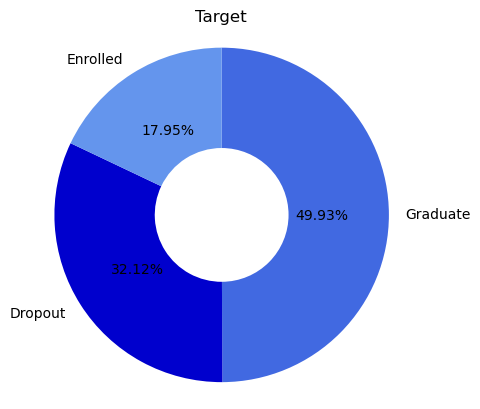

In [17]:
Target = df_clean['Target'].value_counts()

plt.pie(Target, labels = Target.index, startangle = 90, 
        counterclock = False,colors = ['royalblue', 'mediumblue', 'cornflowerblue'],
        autopct='%2.2f%%', wedgeprops = {'width' : 0.6})
plt.axis('square')
plt.title('Target');

According to the insight, approximately 50% of the students are Graduates.
The percentage of dropouts exceeds 30%.

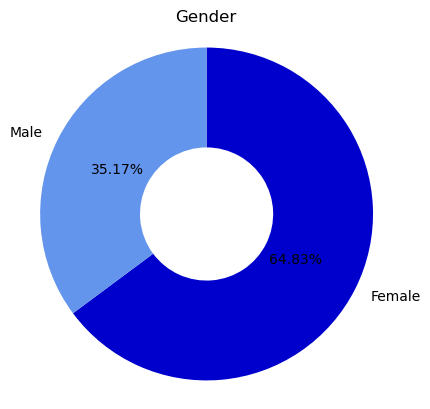

In [18]:
Gender = df_clean['Gender'].value_counts()

plt.pie(Gender, labels = Gender.index, startangle = 90, 
        counterclock = False,colors = ['mediumblue', 'cornflowerblue'],
        autopct='%2.2f%%', wedgeprops = {'width' : 0.6})
plt.axis('square')
plt.title('Gender');

According to the insight, approximately 65% of the students are Females.

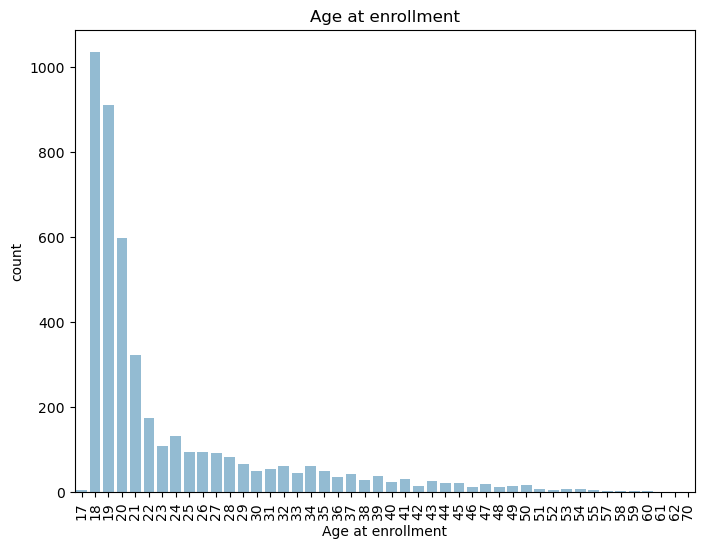

In [19]:
data = df_clean['Age at enrollment'].value_counts()

plt.figure(figsize=[8, 6])
base_color = sns.color_palette("Blues")[2]
sns.countplot(data=df_clean, x='Age at enrollment', color = base_color);
plt.xticks(rotation=90);
plt.title('Age at enrollment');

I observed that most students enroll between the ages of 18 - 22, the rate of enrollment declined after at Age 23, then a slight increase at 24, after which a continous decline was observed.

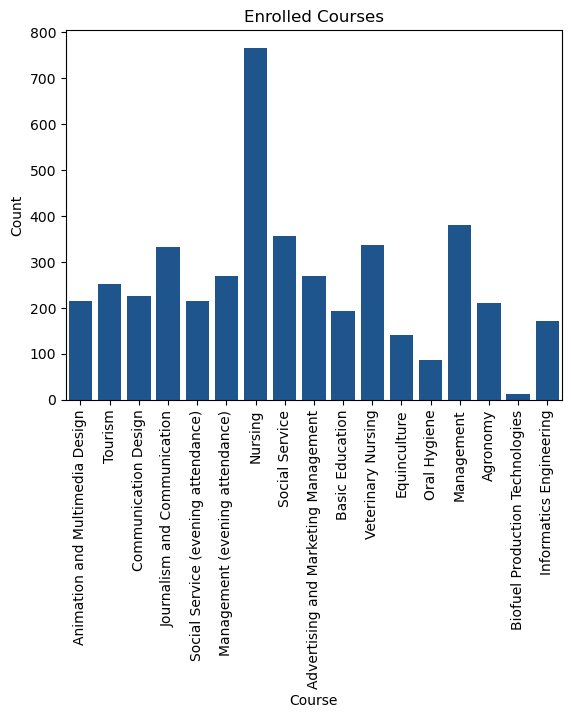

In [20]:
data = df_clean['Course'].value_counts()

sns.countplot(data= df_clean, x='Course', color = sns.color_palette("Blues")[5])
plt.xticks(rotation=90)
plt.xlabel('Course')
plt.ylabel('Count')
plt.title('Enrolled Courses');

The main enrolled course is Nursing, followed by Management(Daytime Attendance), social service (Daytime Attendance) and Veterinary Nursing. Oral Hygiene and Biofuel Production Technologies are the least enrolled courses.

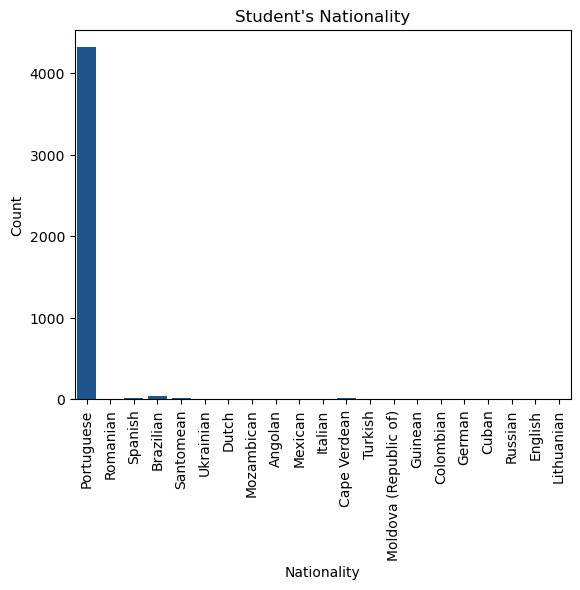

In [21]:
data = df_clean['Nationality'].value_counts()

sns.countplot(data= df_clean, x='Nationality', color = sns.color_palette("Blues")[5])
plt.xticks(rotation=90)
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Student\'s Nationality');

Majority of the students are Portuguese.

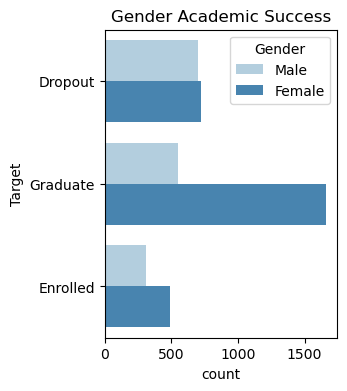

In [22]:
plt.figure(figsize = [3, 4])
ax = sns.countplot(data = df_clean, y = 'Target', hue = 'Gender',
                   palette = 'Blues')
ax.legend(title = 'Gender')
plt.title('Gender Academic Success')
plt.ylabel('Target');

From the data, we can see that there are 2x more female graduates than male graduates, But almost equal number of dropouts. Considering how we have over 65% female students, this is a reasonable analysis. 

### Financial Factor

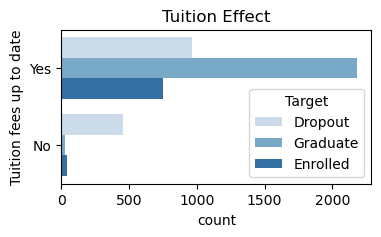

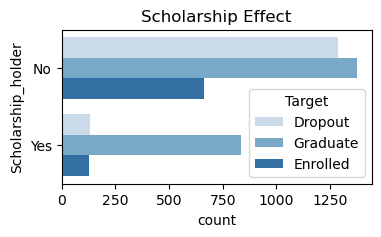

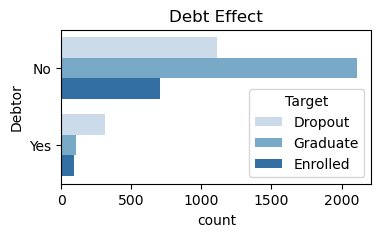

In [23]:
plt.figure(figsize = [4, 2])
ax = sns.countplot(data = df_clean, y = 'Tuition_fees', hue = 'Target',
                   palette = 'Blues')
ax.legend(title = 'Target')
plt.title('Tuition Effect')
plt.ylabel('Tuition fees up to date');

plt.figure(figsize = [4, 2])
ax = sns.countplot(data = df_clean, y = 'Scholarship_holder', hue = 'Target',
                   palette = 'Blues')
ax.legend(title = 'Target')
plt.title('Scholarship Effect')
plt.ylabel('Scholarship_holder');

plt.figure(figsize = [4, 2])
ax = sns.countplot(data = df_clean, y = 'Debtor', hue = 'Target',
                   palette = 'Blues')
ax.legend(title = 'Target')
plt.title('Debt Effect')
plt.ylabel('Debtor');

From the graph, It can be observed that students with Tuition fees up to date have a higher chance of graduating while student with Debts have a lower chance of graduating. It is also interesting to note that students with scholarship have a high chance of graduating.

### Academic Factor

<Figure size 2000x1000 with 0 Axes>

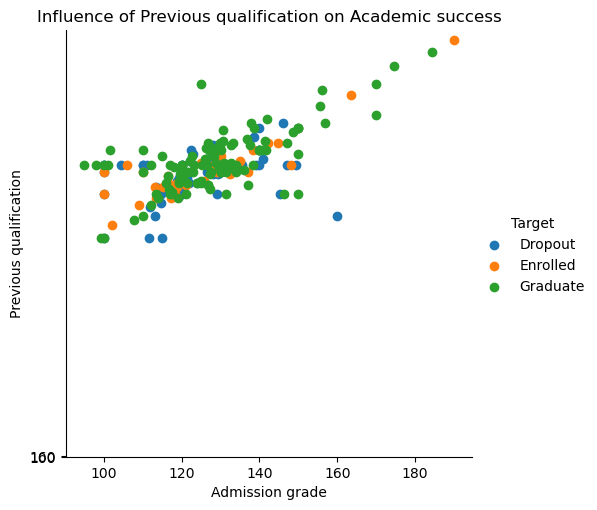

In [24]:
data = df_clean['Previous qualification (grade)'].value_counts()

np.random.seed(5)
sample = np.random.choice(df_clean.shape[0], 200, replace = False)
df_clean_subset = df_clean.reindex(sample)

plt.figure(figsize = [20,10])
g = sns.FacetGrid(data = df_clean_subset, hue = 'Target', height = 5);
g.map(plt.scatter, 'Admission grade', 'Previous qualification (grade)');
tick_props = np.arange(0.50, 1.05, 0.30)
tick_names = ['{:0.0f}'.format(v*200) for v in tick_props]
plt.yticks(tick_props, tick_names)
plt.xlabel('Admission grade')
plt.ylabel('Previous qualification')
plt.title('Influence of Previous qualification on Academic success')
g.add_legend(title = 'Target');

It can be observed that students who had high grades from previous qualification and admission grade has a higher chance of graduating.

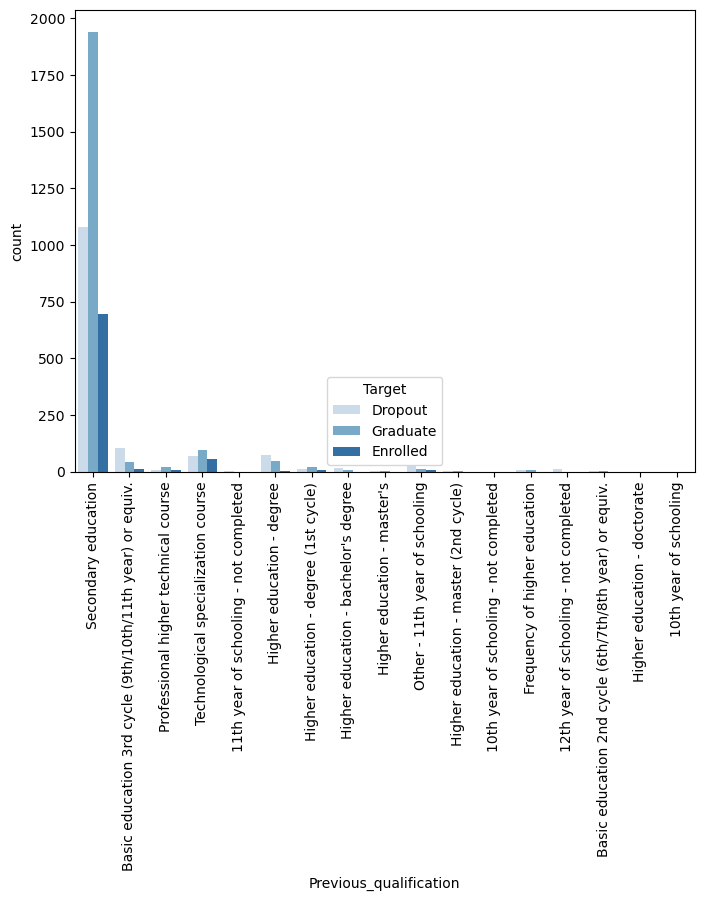

In [25]:
#Plot the categorical variables
plt.figure(figsize = [8, 6])

# subplot 1: Previous_qualification vs. special_needs
sns.countplot(data = df_clean, x = 'Previous_qualification', hue ='Target' , palette = "Blues")
ax.legend(loc=2, ncol = 5, title='Target')
plt.xticks(rotation=90);

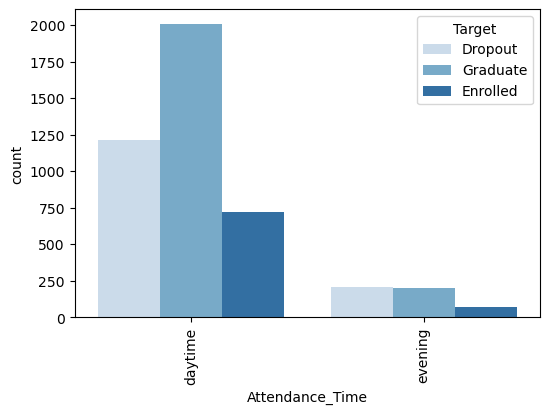

In [26]:
# subplot 2: Previous_qualification vs Attendance_Time
plt.figure(figsize = [6, 4])
sns.countplot(data = df_clean, x = 'Attendance_Time', hue = 'Target', palette ="Blues")
ax.legend(loc=2, ncol = 5, title="Target")
plt.xticks(rotation=90); 

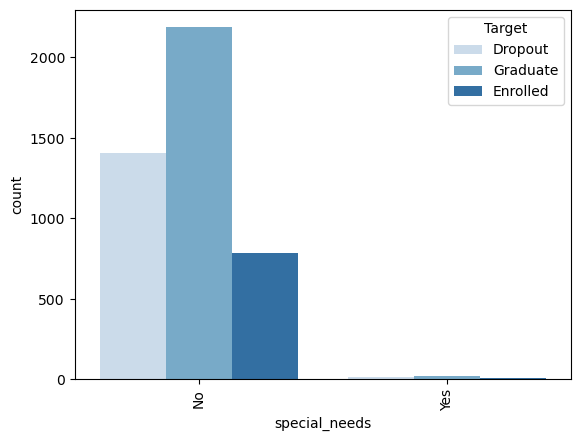

In [27]:
# subplot 3: special_needs vs Attendance_Time
sns.countplot(data = df_clean, x = 'special_needs', hue = 'Target', palette = "Blues")
ax.legend(loc = 1, ncol = 4, title="Target");
plt.xticks(rotation=90);

According to the Academic Analysis, Secondary Education students with high previous qualification grade and academic grade enrolled in daytime learning with No special needs have a high chance of Academic success.

### Demographic Factor

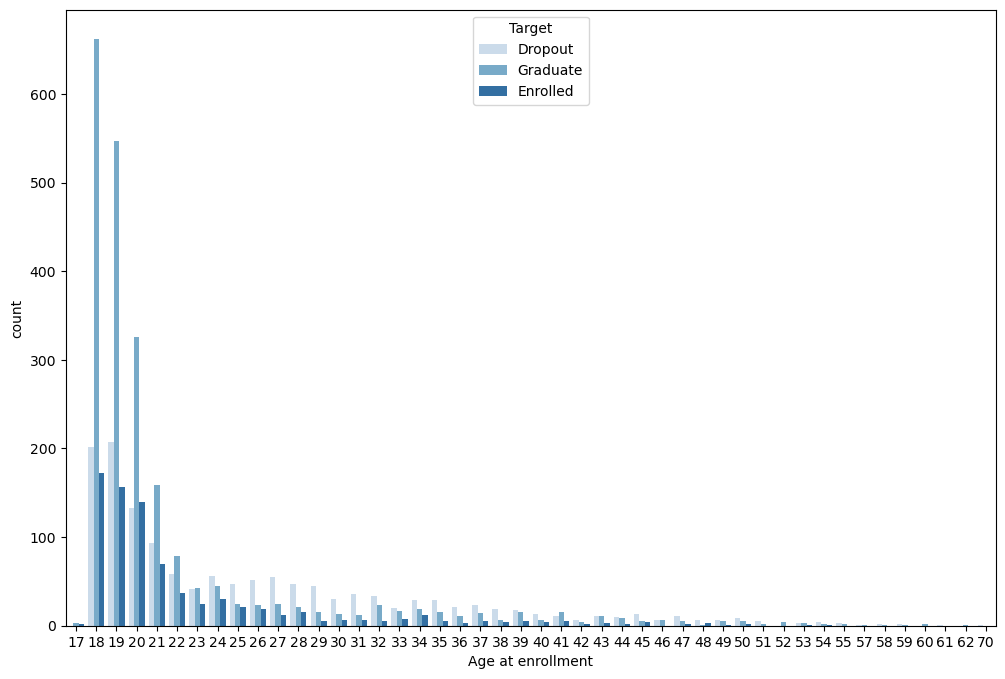

In [28]:
plt.figure(figsize = [12, 8])
sns.countplot(data = df_clean, x = 'Age at enrollment', hue ='Target' , palette = "Blues")
ax.legend(loc=2, title='Target')

From the data, I observed that from age 18 - 22, there was a reccord of high graduate success with Age 18 being the highest followed by Age 19. I also noticed a very interesting insight, from Age 24 to Age 40, the Dropout rate was higher than the Graduate rate, then a slight change at Age 41 where graduate rate surpassed dropout.

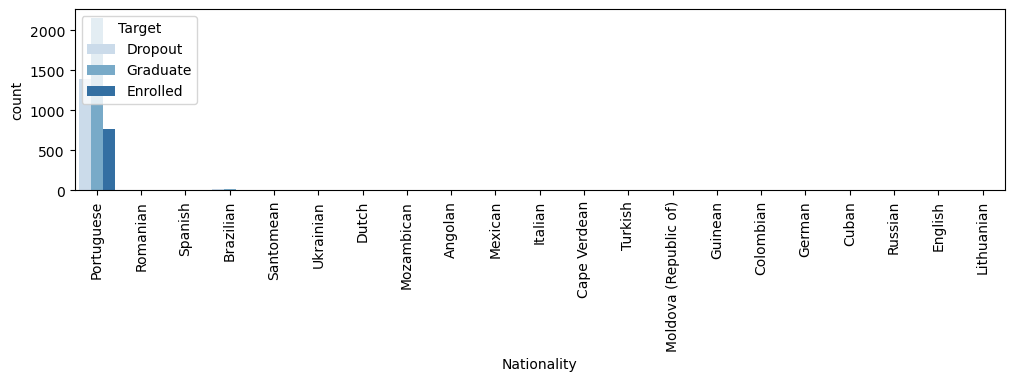

In [29]:
#Plot the categorical variables
plt.figure(figsize = [12, 8])

# subplot 1: Nationality vs. Target
plt.subplot(3, 1, 1)
sns.countplot(data = df_clean, x = 'Nationality', hue ='Target' , palette = "Blues")
ax.legend(loc=2, ncol = 5, title='Target')
plt.xticks(rotation=90);

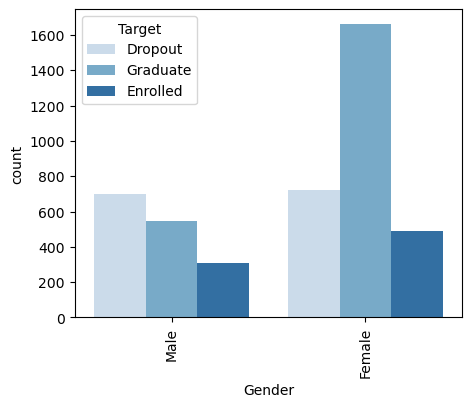

In [30]:
#Plot the categorical variables
plt.figure(figsize = [5, 4])

# subplot 1: Gender vs. Target
sns.countplot(data = df_clean, x = 'Gender', hue ='Target' , palette = "Blues")
ax.legend(loc=1, ncol = 2, title='Target')
plt.xticks(rotation=90);

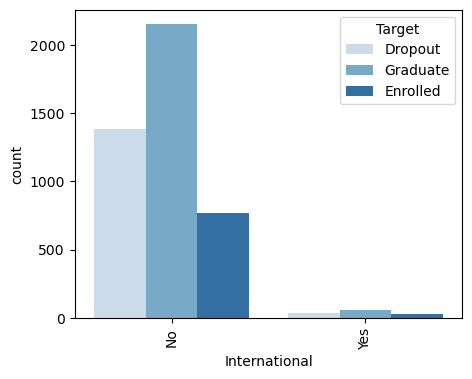

In [31]:
#Plot the categorical variables
plt.figure(figsize = [5, 4])

# subplot 1: International vs. Target
sns.countplot(data = df_clean, x = 'International', hue ='Target' , palette = "Blues")
ax.legend(loc=2, ncol = 2, title='Target')
plt.xticks(rotation=90);

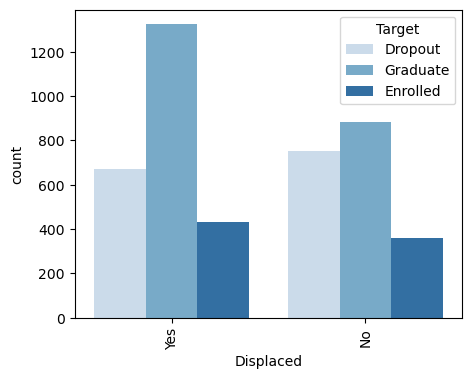

In [32]:
#Plot the categorical variables
plt.figure(figsize = [5, 4])

# subplot 1: Displaced vs. Target
sns.countplot(data = df_clean, x = 'Displaced', hue ='Target' , palette = "Blues")
ax.legend(loc=2, ncol = 2, title='Target')
plt.xticks(rotation=90);

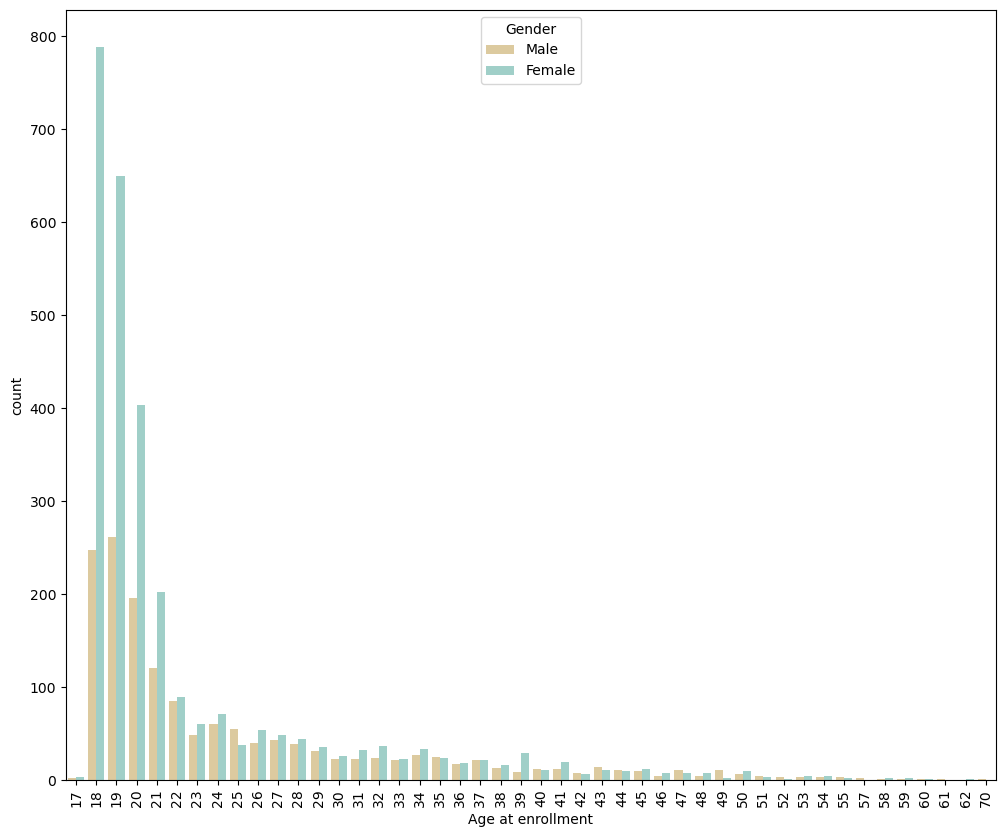

In [33]:
#Plot the categorical variables
plt.figure(figsize = [12, 10])

# subplot 1: Age at enrollment vs. Gender
sns.countplot(data = df_clean, x = 'Age at enrollment', hue ='Gender' , palette = "BrBG")
ax.legend(loc=2, ncol = 2, title='Gender')
plt.xticks(rotation=90);

According to the Demographic Analysis, I noticed that majority of academic success was recorded at Age 18 - 22, which happens to be majorly Females. While comparing Age and Gender, I noticed that majority of the gender at 25 are Males which also recorded a High dropout rate. It can be said that the Male students have more dropout rate compared to the female students.

### Enrollment Factor

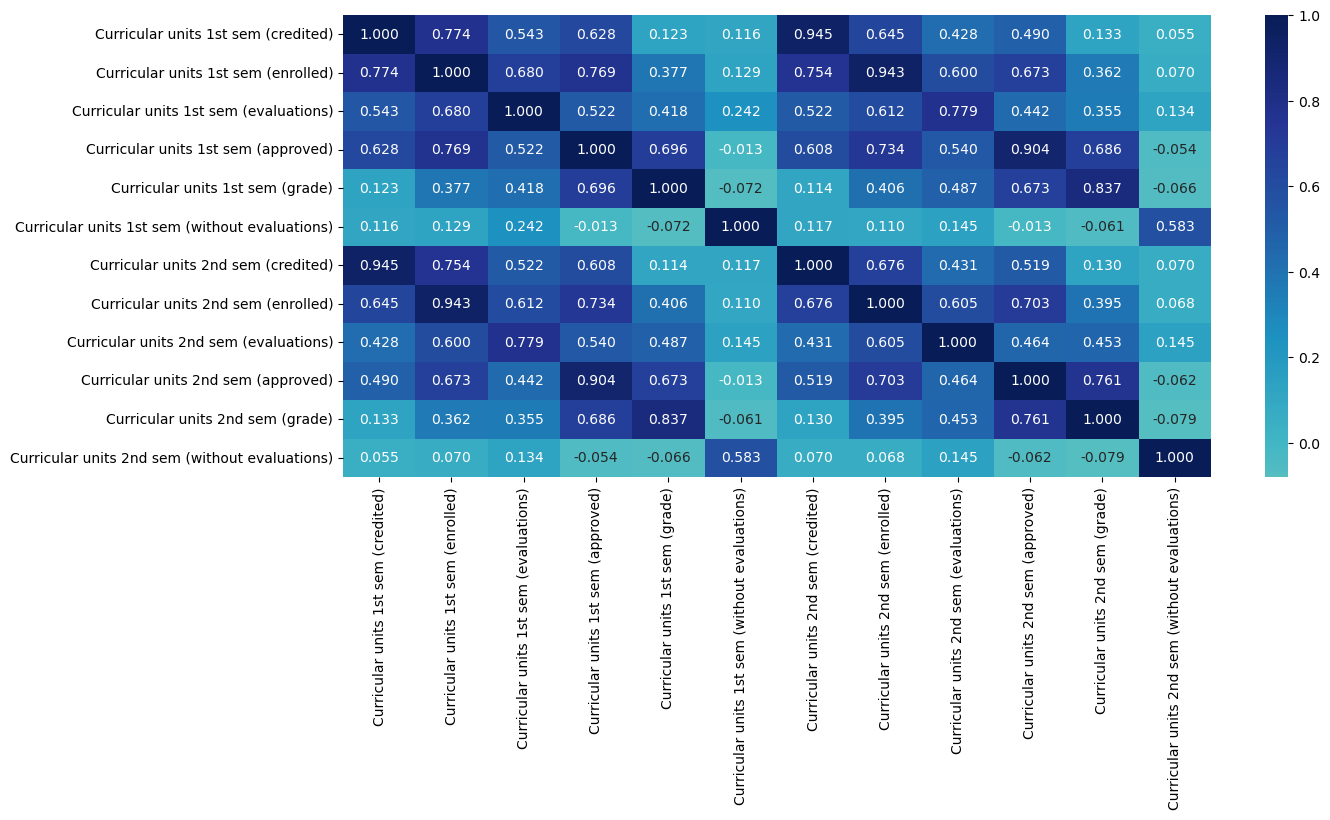

In [34]:
#Using a heat map to check for correlation
Curr_units = ['Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
              'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
              'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
              'Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)',
              'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
              'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)']

#correlation between numerical variables
plt.figure(figsize = [14, 6])
sns.heatmap(df_clean[Curr_units].corr(), annot = True, fmt = '.3f',
           cmap = 'YlGnBu', center = 0);

### Socioeconomic Factor

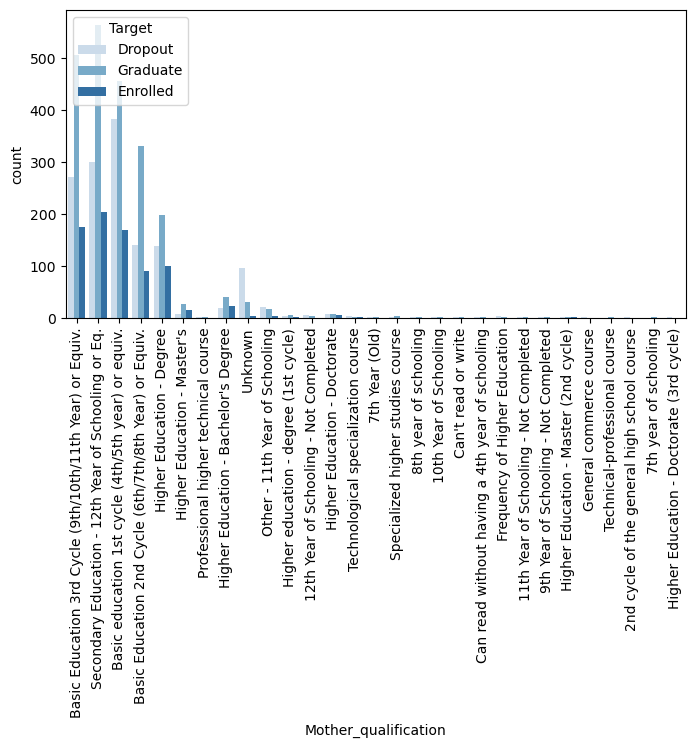

In [35]:
#Plot the categorical variables
plt.figure(figsize = [8,4])

# subplot 1: Mother_qualification vs. Target
sns.countplot(data = df_clean, x = 'Mother_qualification', hue ='Target' , palette = "Blues")
ax.legend(loc=6, title='Target')
plt.xticks(rotation=90);

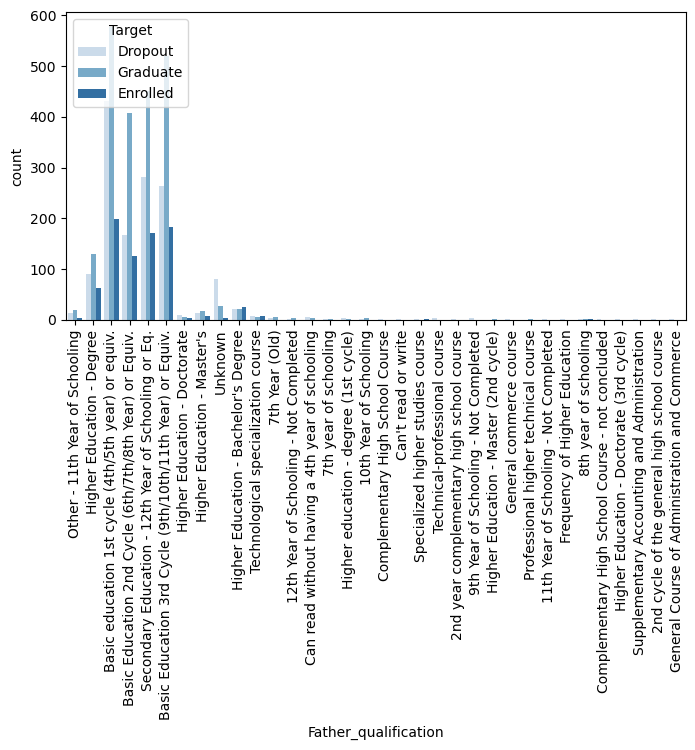

In [36]:
plt.figure(figsize = [8, 4])

# subplot 2: Father_qualification vs Target
sns.countplot(data = df_clean, x = 'Father_qualification', hue = 'Target', palette ="Blues")
ax.legend(loc=6, title="Target")
plt.xticks(rotation=90); 

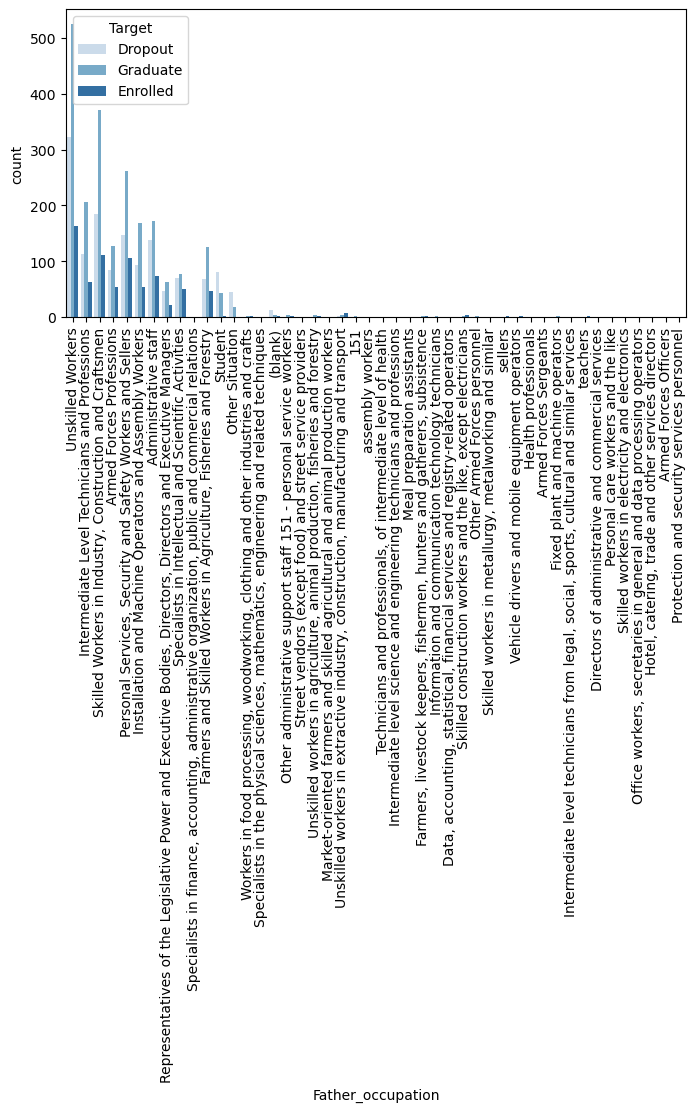

In [37]:
plt.figure(figsize = [8, 4])

# subplot 2: Father_occupation vs Target
sns.countplot(data = df_clean, x = 'Father_occupation', hue = 'Target', palette ="Blues")
ax.legend(loc=6, title="Target")
plt.xticks(rotation=90); 

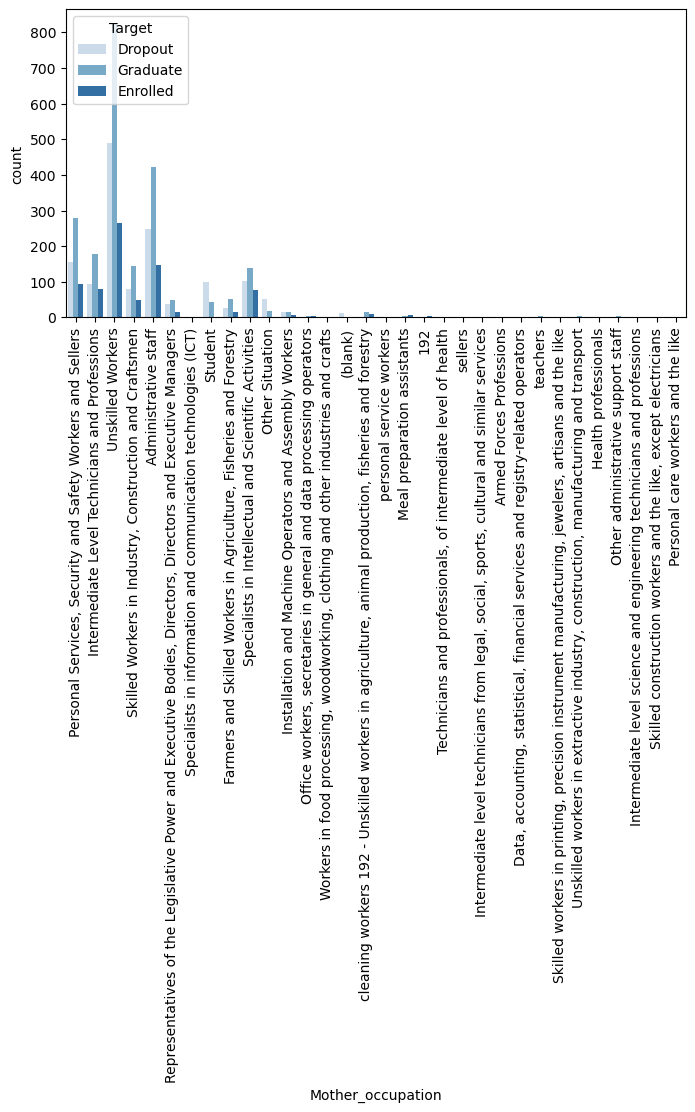

In [38]:
plt.figure(figsize = [8, 4])

# subplot 2: Mother_occupation vs Target
sns.countplot(data = df_clean, x = 'Mother_occupation', hue = 'Target', palette ="Blues")
ax.legend(loc=6, title="Target")
plt.xticks(rotation=90); 

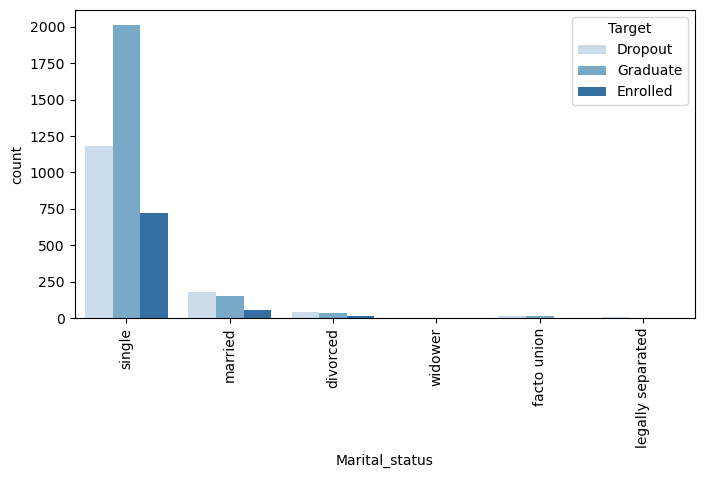

In [39]:
plt.figure(figsize = [8, 4])
sns.countplot(data = df_clean, x = 'Marital_status', hue = 'Target', palette ="Blues")
ax.legend(loc=6, title="Target")
plt.xticks(rotation=90); 

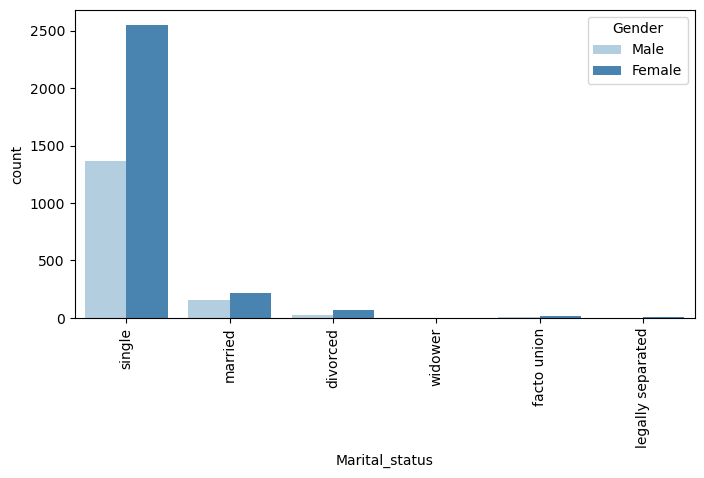

In [46]:
plt.figure(figsize = [8, 4])
sns.countplot(data = df_clean, x = 'Marital_status', hue = 'Gender', palette ="Blues")
ax.legend(loc=6, title="Gender")
plt.xticks(rotation=90); 